# Tutorial for Homework 5 - Interference of Light

In [29]:
# setup by importing some good modules
import numpy as np
import sympy as sp
# print things all pretty
from sympy.abc import *
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches
from mpmath import *

#get_ipython().magic('matplotlib')  # separate window
get_ipython().magic('matplotlib inline') # inline plotting

The mpmath module (http://docs.sympy.org/0.7.1/modules/mpmath/plotting.html) allows one to plot functions without having to digitize the independent variable. Let's take a look at how to use it. In the first example, we'll plot sine and cosine. These functions are built into mpmath and don't even need arguments.  Simply give it the range of x-axis values you want plotted.

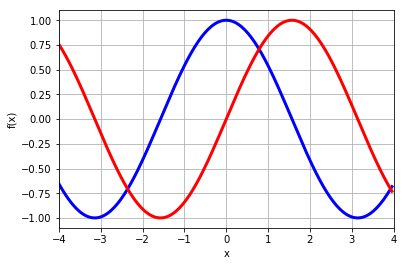

In [30]:
plot([cos, sin], [-4, 4])

## Diffraction

Now, let's look at a function that is relevant to our homework. The intensity pattern of light diffracting through a single slit is

$$I = I_o \left[\frac{\sin \left(\beta\right)}{\beta}\right]^2$$

To simplify the plotting, we'll define $\beta$ to be our $x$ variable.

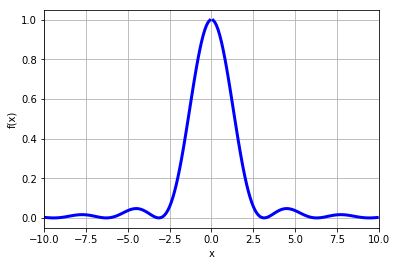

In [31]:
I = lambda x: (sin(x)/x)**2
plot(I, [-10, 10])

Unfortunately, it doesn't seem possible to relabel the axes. A work around is to use sympy to do everything. In fact, this may be better in the end because we will want to take derivatives and integrals, which is sympy's bread and butter. Let's look at sympy's version of what we just did.

In [32]:
x, y= symbols("x, y", real = True)
# Define y
y = (sp.sin(x)/x)**2
y # This causes it to output formatted nicely. The print command formats it as computer code

   2   
sin (x)
───────
    2  
   x   

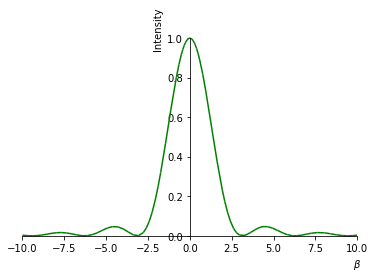

In [40]:
# To change colors
# show = False delays the plot until we can set all of the parameters
# legend turns on the legend and uses the labels we have later.
p = sp.plot((y, (x,-10,10)), show=False,  ylabel='Intensity', xlabel='$\\beta$', line_color='green')

p.show()

We know the intensity equation must have a maximum in the center, i.e., when $\beta\rightarrow0$. L'H$\hat{\rm{o}}$pital's rule says

$$\lim_{\beta\to 0} \frac{\sin\beta}{\beta} = 1$$

So, we get the central maximum. Next, we want a minimum when 

$$D \sin\left(\theta\right) = m\lambda$$

This will occur when $\beta = m\pi$ in the intensity equation above. Rearrarange the destructive interference condition equation above to solve for $m$; multiply by $\pi$ and substitute this into the first equation for $\beta$.

You should get

$$I = I_o \left[\frac{\sin \left(\frac{\pi D\sin\left(\theta\right)}{\lambda}\right)}{\frac{\pi D\sin\left(\theta\right)}{\lambda}}\right]^2$$

This means, we can determine the size of the single slit if we know the wavelength of light we are using. You did this in lab. Let's make a plot of this function by first defining $D=\lambda$ and $\lambda=500$ nm. Recall that $\sin\left(\theta\right)\approx\frac{y}{L}$, where $y$ is the distance away from the central point on the screen, and $L$ is the distance the screen is from the diffraction slit. You should also define $L = 1$ meter.

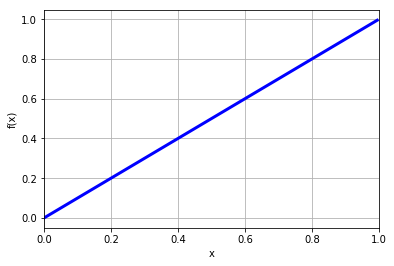

In [11]:
#Here's your chance
wl=0 #variable for wavelength
D=0 #variable for slit width
L=0 #variable for screen distance from slit
plot(lambda y: y, [0,1]) #plot the diffraction pattern

### Interference

Next, let's look at interference. We expect interference to have constructive maxima following the relationship

$$d \sin\left(\theta\right) = m\lambda$$

The angle $\theta$ is the same as for diffraction. It is the angle away from a straight traveling beam. In this case $d$ is the spacing between two slits. From this pattern of constructive interference, we get a bright spot when $\theta=0$ and again when $\sin\left(\theta\right) = \lambda$. This means we'll get a bright spot on the screen when

$$\sin\left(\theta\right) \approx \frac{y}{L} = \frac{m\lambda}{d}$$

$$y = \frac{mL\lambda}{d}$$

Thus, we expect repeated constructive interference bright spots every integer multiple of

$$\frac{L\lambda}{d}$$

Since the interference has a bright spot when $\theta = 0$, we can write the intensity function as a cosine. There will be high intensity at the same locations as the conditional equation $d \sin\left(\theta\right) = m\lambda$. We know the cosine function should be maximum (have an argument of $m\pi$) at these locations. We also know that intensity is the square of the electric field of the light. This means the cosine function will be squared. This prevents a negative intensity, which makes no sense.

$$I = I_o \cos^2\left(\alpha\right)$$

Similar to the diffraction arguments, the angle $\alpha = m\pi$ is constructive interference. This gives

$$\alpha = \frac{\pi d \sin\left(\theta\right)}{\lambda}$$

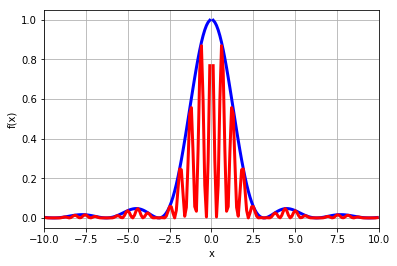

In [12]:
plot([lambda x: (sin(x)/x)**2, lambda x: (sin(x)/x*cos(5*x))**2], [-10, 10])

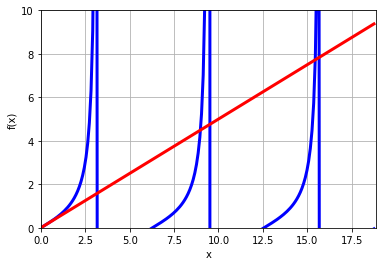

In [28]:
plot([lambda x: tan(x/2), lambda x: x/2], [0,6*pi], ylim=(0,10))